# ML

## **Data Preprocessing & Cleaning**



In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df=pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Speculations of non-null values . children,country,agent,company < likely to have missing values : 119386,  118902, 103050 and 6797 consecutively. Whereas the majority values is at 119390
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Describing datasets with it's min, max, mean, median and standard deviation values
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Assess the variable with missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
most_missing_variable = missing_values.idxmax()
most_missing_values = missing_values.max()
print(missing_values)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# Displaying the number of unique values in each categories
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


In [ ]:
# Displaying the number of rows that contains children with Null/Na values
nan_children_rows = df[df['children'].isna()]
print(nan_children_rows)

            hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40600                        1                     0       2  ...   
40667                        0                     2       2  ...   
40679                        0                     2       3  ... 

In [ ]:
# Replacing NA values of Children to 0, vwhereby NA/Null could indicate that they do not have any childrens
df['children'] = df['children'].fillna(0)
print(df['children'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64


In [ ]:
# Converting children from float to int
df['children'] = df['children'].astype(int)

In [ ]:
# Detecting which country has (Null) values
# Note that removing (Null) values affects the total number of rows as it will delete the necessary rows
nan_country_rows = df[df['country'].isna()]
print(nan_country_rows)

               hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel            0        118               2015   
4127    Resort Hotel            1          0               2016   
7092    Resort Hotel            1          8               2016   
7860    Resort Hotel            1         39               2016   
8779    Resort Hotel            1          0               2016   
...              ...          ...        ...                ...   
65908     City Hotel            1          0               2017   
65909     City Hotel            1          0               2017   
65910     City Hotel            1          0               2017   
80830     City Hotel            0          4               2015   
101488    City Hotel            0          1               2016   

       arrival_date_month  arrival_date_week_number  \
30                   July                        27   
4127             February                         8   
7092                 July     

In [ ]:
# Datasets with removed Country with Null Values
df_cleaned= df.dropna(subset=['country'])

In [ ]:
# Crosschecking "agent" variable. 16006 null values + 102896 = 118902 (Sum)
# Note that "Agent" variable with Null Values does not have to be removed
# Null indicates the sources of hotel bookings does not come from agent. Eg , 304, 240 < agent ID
# Hence, Values Justified correctly
df_cleaned[df_cleaned['agent'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [ ]:
# Same goes to "Company" 112279 (Null Values) + 6623 (Company Id) = 118902
# Hence, Values Justified correctly
df_cleaned[df_cleaned['company'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Dropping / Removing undefined values from distribution channel and market segment
df_cleaned = df_cleaned[(df_cleaned['distribution_channel'] != 'Undefined') & (df_cleaned['market_segment'] != 'Undefined')]

In [ ]:
# Replacing Undefined values to SC (Since they're both the same)
df_cleaned['meal'] = df_cleaned['meal'].replace('Undefined', 'SC')

<ipython-input-15-05a5dcafc267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['meal'] = df_cleaned['meal'].replace('Undefined', 'SC')


In [ ]:
# Replace NaN values with '0'
df_cleaned[['agent', 'company']] = df_cleaned[['agent', 'company']].fillna(0)

# Convert all non-zero values to 1
df_cleaned[['agent', 'company']] = df_cleaned[['agent', 'company']].applymap(lambda x: 0 if x == 0 else 1)

print(df_cleaned[['agent', 'company']])

        agent  company
0           0        0
1           0        0
2           0        0
3           1        0
4           1        0
...       ...      ...
119385      1        0
119386      1        0
119387      1        0
119388      1        0
119389      1        0

[118897 rows x 2 columns]


<ipython-input-16-953b38cdcdcc>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[['agent', 'company']] = df_cleaned[['agent', 'company']].applymap(lambda x: 0 if x == 0 else 1)


### **Summary Statistics**

## **EDA**

In [ ]:
# Display the first few rows of the dataset
print(df_cleaned.head())

# Display the number of rows and columns
print(f"Dataset shape: {df_cleaned.shape}")

# Information about columns, data types, and non-null values
print(df_cleaned.info())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
# Descibing the dataset
df_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371355,104.311446,2016.157666,27.166548,15.800971,0.928888,2.502141,1.858390,0.104199,0.007948,0.032011,0.087143,0.131635,0.221183,0.865405,0.055704,2.330774,102.003153,0.061877,0.571671
std,0.483169,106.903759,0.707454,13.590028,8.780305,0.996215,1.900175,0.578578,0.399166,0.097381,0.176030,0.845872,1.484678,0.652787,0.341292,0.229350,17.630525,50.486065,0.244158,0.792670
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,1.000000,1.000000,391.000000,5400.000000,8.000000,5.000000


### **Correlation Heatmap Matrix**

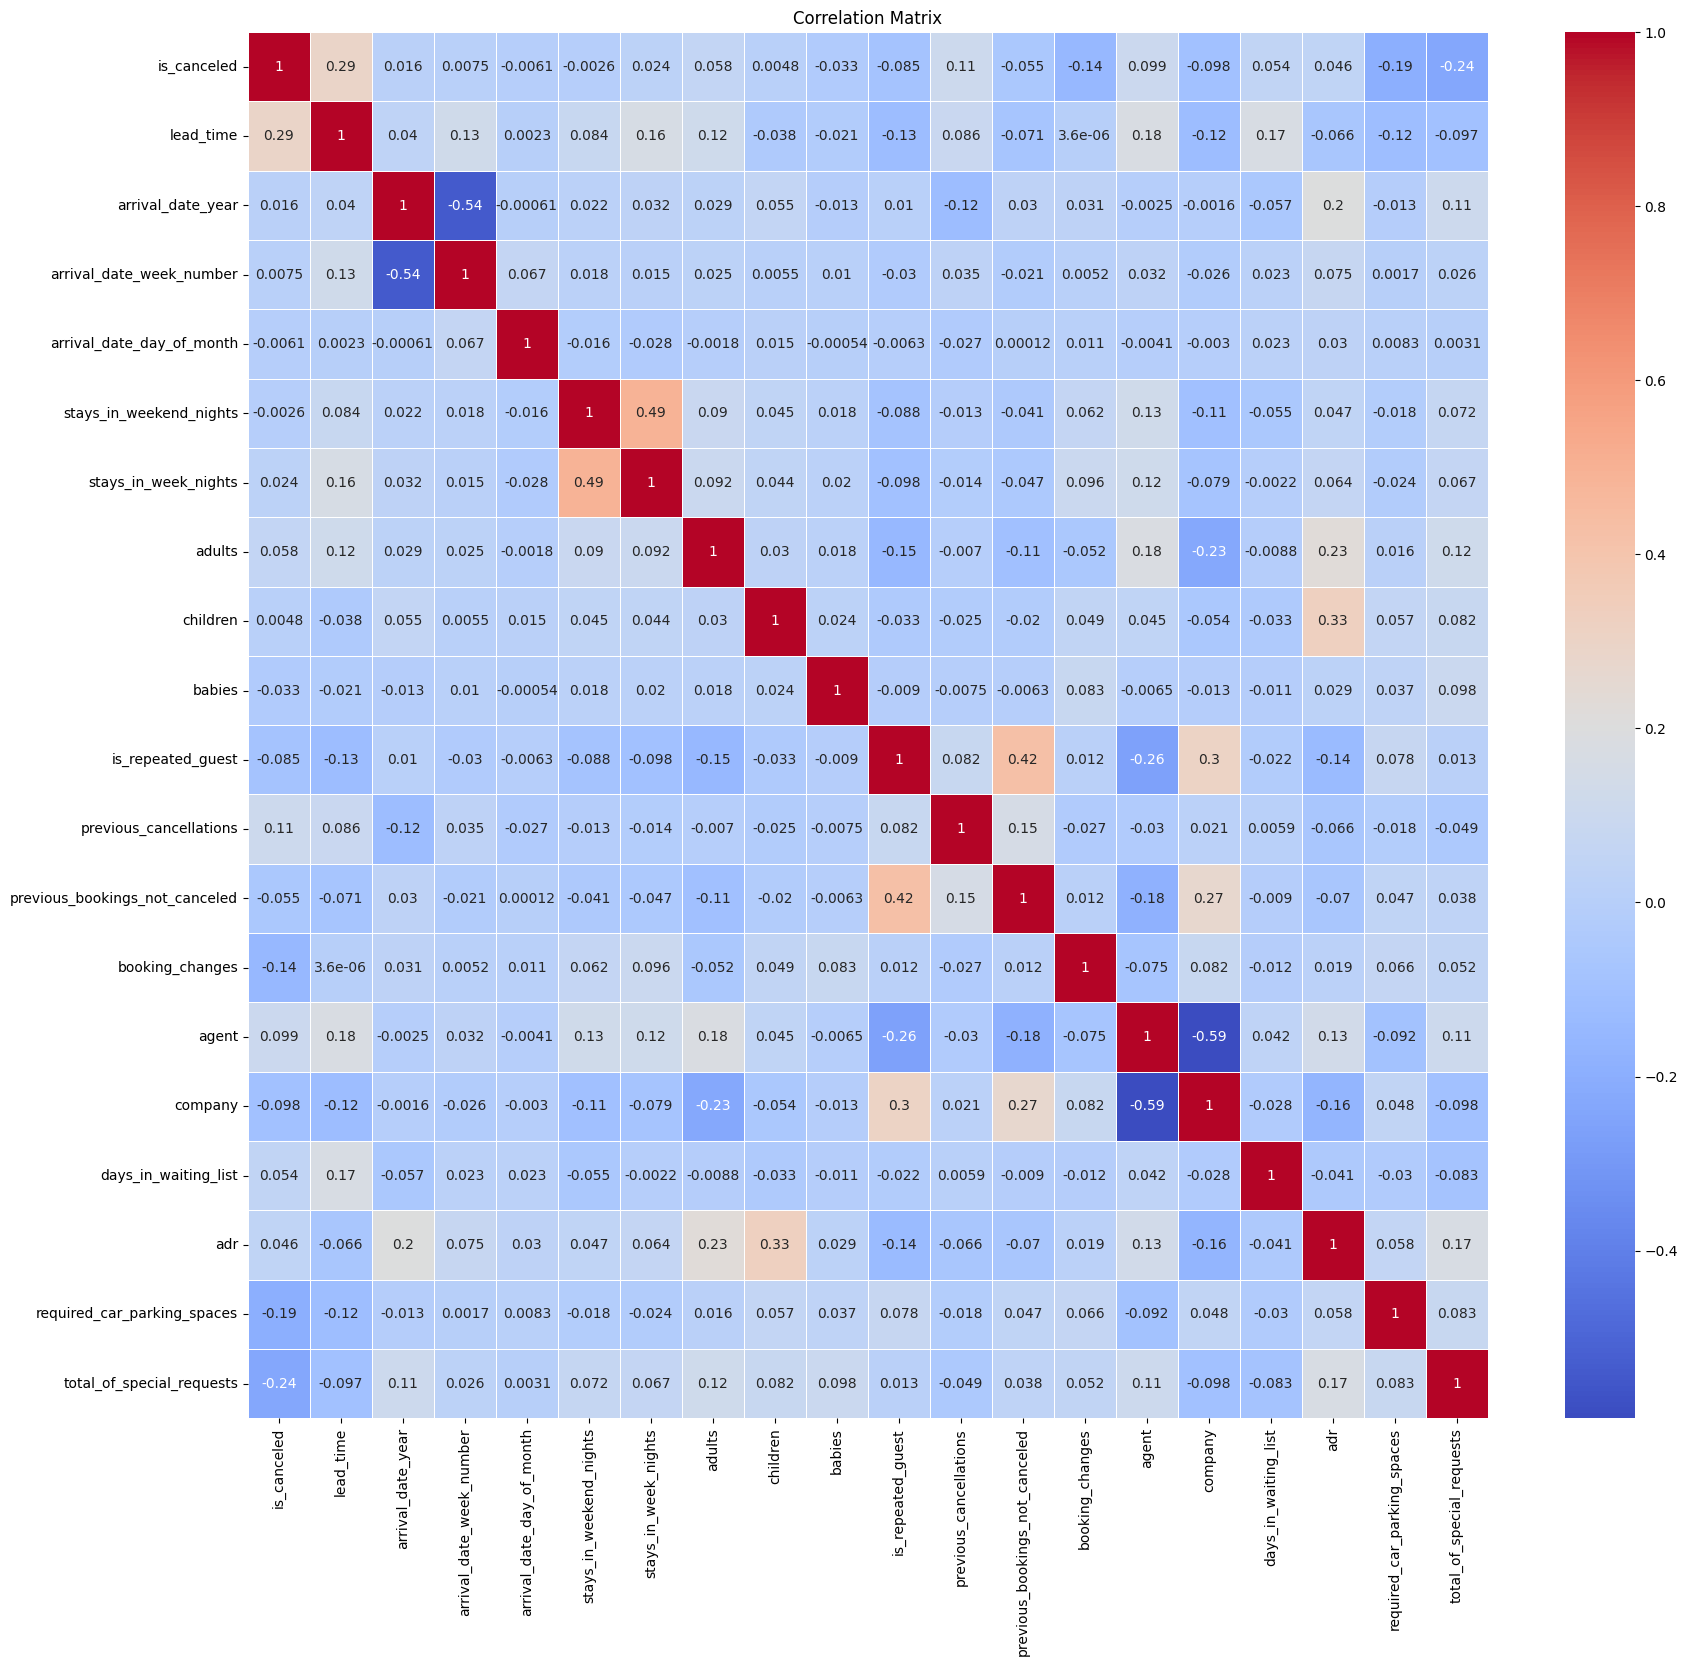

In [ ]:
def plot_correlation_heatmap(df_cleaned):
  # Select only the numerical columns for correlation
  numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

  # Calculate the correlation matrix
  correlation_matrix = numerical_columns.corr()

  # Plot the heatmap using seaborn
  plt.figure(figsize=(20, 18))  # Adjust the size of the heatmap
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

  # Add title
  plt.title('Correlation Matrix')

  # Display the heatmap
  plt.show()

plot_correlation_heatmap(df_cleaned)

### **Outliers removal**

### **Boxplots outliers removal**

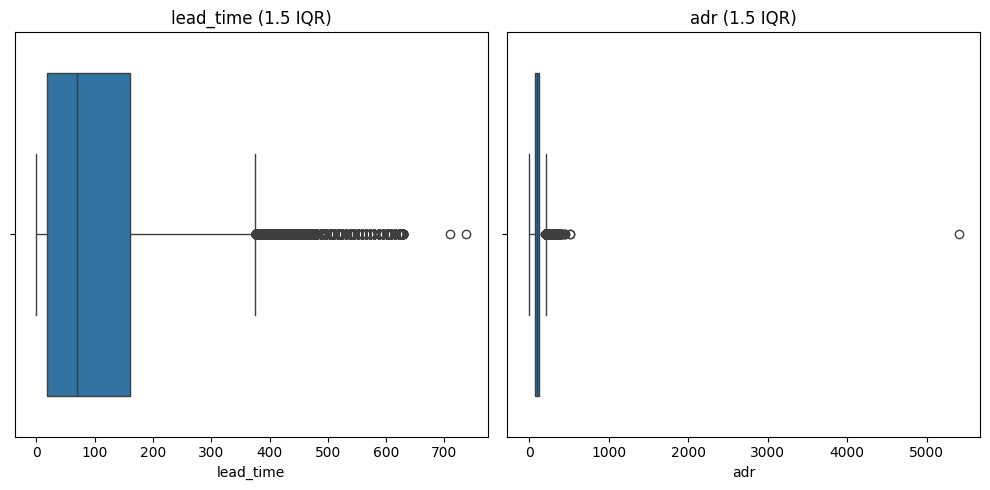

In [ ]:
def plot_boxplots(df_cleaned):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  # Boxplot for 'lead_time' & 'adr'
  sns.boxplot(x=df_cleaned['lead_time'], ax=axes[0])
  axes[0].set_title('lead_time (1.5 IQR)')

  sns.boxplot(x=df_cleaned['adr'], ax=axes[1])
  axes[1].set_title('adr (1.5 IQR)')

  # Adjust layout
  plt.tight_layout()
  plt.show()
plot_boxplots(df_cleaned)

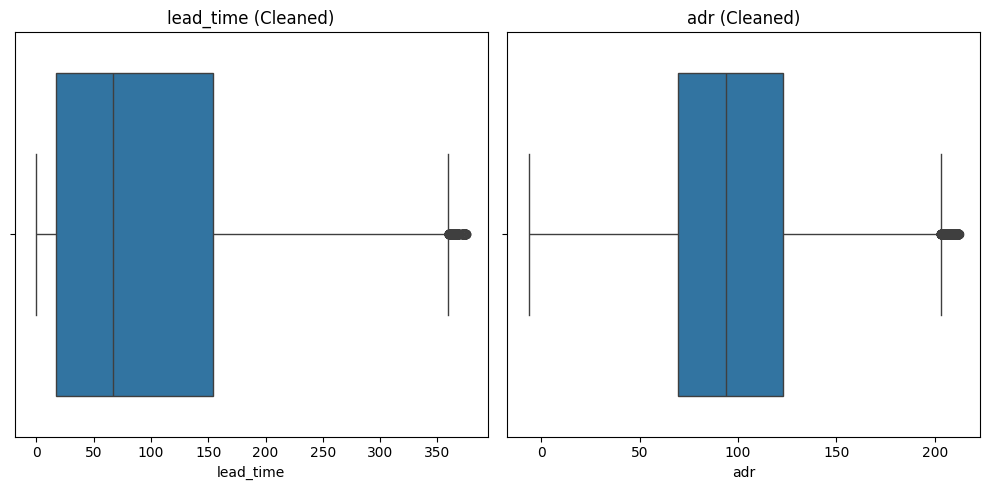

In [ ]:
# IQR method in removing outliers USING 1.5 THRESHOLD
def remove_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

columns_to_check = ['lead_time','adr']
df_cleaned = df_cleaned.copy()

for column in columns_to_check:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

def display_boxplot1(df_cleaned):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

  sns.boxplot(x=df_cleaned['lead_time'], ax=axes[0])
  axes[0].set_title('lead_time (Cleaned)')

  sns.boxplot(x=df_cleaned['adr'], ax=axes[1])
  axes[1].set_title('adr (Cleaned)')

  plt.tight_layout()
  plt.show()

display_boxplot1(df_cleaned)

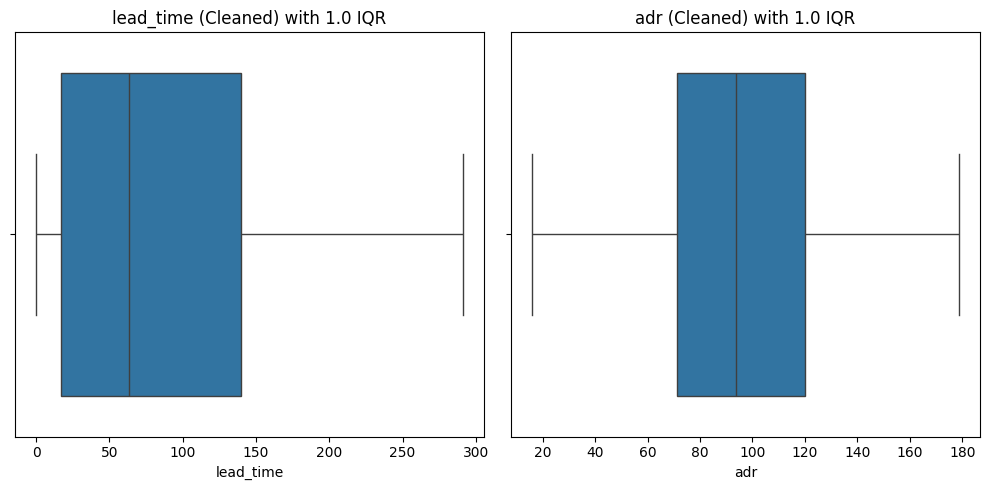

In [ ]:
# IQR method in removing outliers using -1 and +1 threshhold, to remove the entire outliers
def remove_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

columns_to_check = ['lead_time','adr']
df_cleaned2 = df_cleaned.copy()

for column in columns_to_check:
    df_cleaned2 = remove_outliers_iqr(df_cleaned2, column)

def display_boxplot2(df_cleaned2):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

  sns.boxplot(x=df_cleaned2['lead_time'], ax=axes[0])
  axes[0].set_title('lead_time (Cleaned) with 1.0 IQR')

  sns.boxplot(x=df_cleaned2['adr'], ax=axes[1])
  axes[1].set_title('adr (Cleaned) with 1.0 IQR')

  plt.tight_layout()
  plt.show()

display_boxplot2(df_cleaned2)

### **Removing seen outliers from datasets Child and Babies**

In [ ]:
# Combine conditions for babies and children outliers
outliers_combined = df_cleaned2[(df_cleaned2['babies'] > 2) | (df_cleaned2['children'] > 3)]

# Display rows with outliers for manual inspection
print(outliers_combined)

              hotel  is_canceled  lead_time  arrival_date_year  \
328    Resort Hotel            1         55               2015   
46619    City Hotel            0         37               2016   
78656    City Hotel            0         11               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
328                 July                        29                         12   
46619            January                         3                         12   
78656            October                        42                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
328                          4                    10       2  ...   
46619                        0                     2       2  ...   
78656                        2                     1       1  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
328      No Deposit      1       0                    0  

In [ ]:
# Removing outliers for babies that has more than 2, and children that has more than 3
df_cleaned2 = df_cleaned2[(df_cleaned['babies'] <= 2) & (df_cleaned2['children'] <= 3)]

<ipython-input-24-5bea0837ee69>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned2 = df_cleaned2[(df_cleaned['babies'] <= 2) & (df_cleaned2['children'] <= 3)]


In [ ]:
# Making a new csv file to validate the outliers removal
df_cleaned2.to_csv("outliers removed.csv", index=False)

In [ ]:
# Reading the "outliers removed" file in a new environment
df_cleaned2 = pd.read_csv('outliers removed.csv')
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           99762 non-null  object 
 1   is_canceled                     99762 non-null  int64  
 2   lead_time                       99762 non-null  int64  
 3   arrival_date_year               99762 non-null  int64  
 4   arrival_date_month              99762 non-null  object 
 5   arrival_date_week_number        99762 non-null  int64  
 6   arrival_date_day_of_month       99762 non-null  int64  
 7   stays_in_weekend_nights         99762 non-null  int64  
 8   stays_in_week_nights            99762 non-null  int64  
 9   adults                          99762 non-null  int64  
 10  children                        99762 non-null  int64  
 11  babies                          99762 non-null  int64  
 12  meal                            

## **Removing directly related features to prevent data leakage**

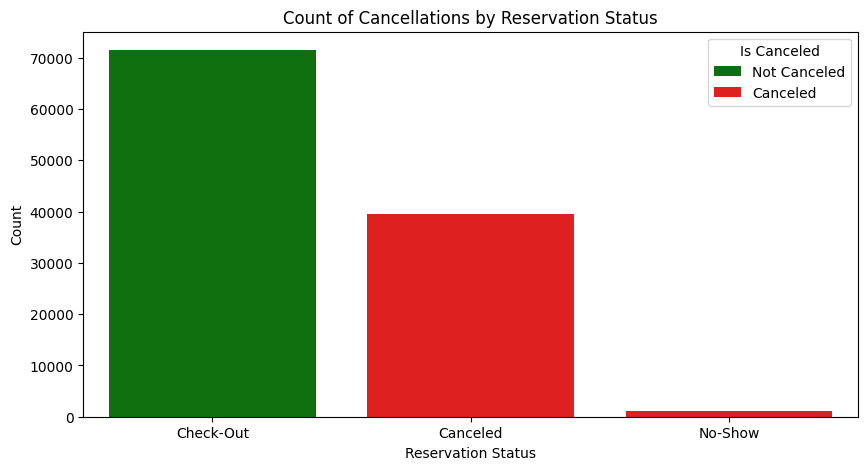

In [ ]:
# Reservation status
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df_cleaned, palette=['green', 'red'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [ ]:
df_cleaned2.groupby('reservation_status')['is_canceled'].mean()

,is_canceled
reservation_status,
Canceled,1.0
Check-Out,0.0
No-Show,1.0


In [ ]:
# Convert 'reservation_status_date' to datetime format
df_cleaned2['reservation_status_date'] = pd.to_datetime(df_cleaned2['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
df_cleaned2['reservation_status_days_difference'] = (df_cleaned2['reservation_status_date'] - pd.to_datetime(df_cleaned2['arrival_date_year'].astype(str) + '-' + df_cleaned2['arrival_date_month'] + '-' + df_cleaned2['arrival_date_day_of_month'].astype(str))).dt.days

df_cleaned2[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,1
1,1
2,2
3,2
4,2


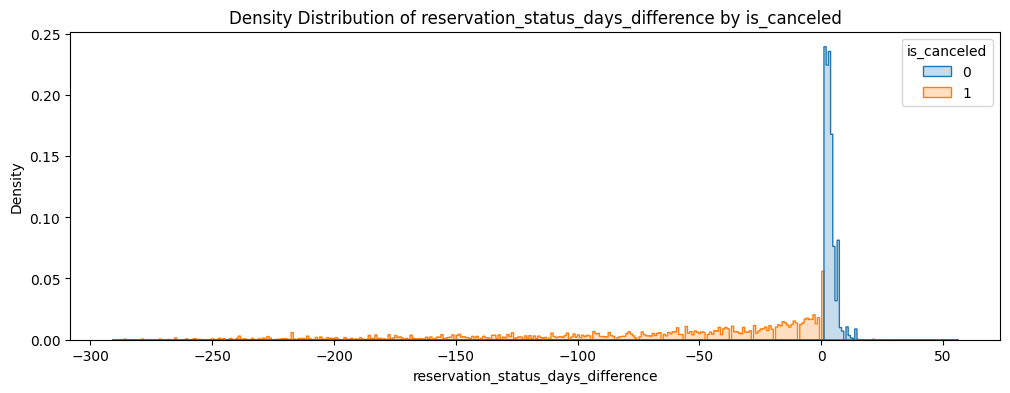

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_cleaned2, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [ ]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(df_cleaned2[df_cleaned2['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(df_cleaned2[df_cleaned2['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    64860
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    33112
Name: count, dtype: int64


### **Dropping irrelevant data**

In [ ]:
df_cleaned2= df_cleaned2.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

In [ ]:
# Dropping assigned room types and arrival date year
df_cleaned2= df_cleaned2.drop(['assigned_room_type'], axis=1)
df_cleaned2= df_cleaned2.drop(['arrival_date_year'], axis=1)
df_cleaned2= df_cleaned2.drop(['reservation_status'], axis=1)

In [ ]:
# Dropping 0 adults, because it's absurd to have babies and children in room without parents
df_cleaned2= df_cleaned2[df_cleaned2['adults'] != 0]

## **Feature Engineering**

In [ ]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_cleaned2['arrival_date_month'] = df_cleaned2['arrival_date_month'].apply(lambda x: months.index(x) + 1)

In [ ]:
# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df_cleaned2 = pd.get_dummies(df_cleaned2, columns=one_hot_cols, drop_first=True)

In [ ]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99565 entries, 0 to 99761
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     99565 non-null  int64  
 1   lead_time                       99565 non-null  int64  
 2   arrival_date_month              99565 non-null  int64  
 3   arrival_date_week_number        99565 non-null  int64  
 4   arrival_date_day_of_month       99565 non-null  int64  
 5   stays_in_weekend_nights         99565 non-null  int64  
 6   stays_in_week_nights            99565 non-null  int64  
 7   adults                          99565 non-null  int64  
 8   children                        99565 non-null  int64  
 9   babies                          99565 non-null  int64  
 10  country                         99565 non-null  object 
 11  is_repeated_guest               99565 non-null  int64  
 12  previous_cancellations          99565

In [ ]:
# Select features (excluding "reservation_status") and target variable
X = df_cleaned2.drop(columns=["is_canceled"])  # Drop both 'is_canceled' and 'reservation_status'
y = df_cleaned2["is_canceled"]  # Target variable

In [ ]:
# One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)
X

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,7,7,27,1,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,13,7,27,1,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,14,7,27,1,0,2,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,14,7,27,1,0,2,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,7,27,1,0,2,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,21,8,35,30,2,5,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
99758,23,8,35,30,2,5,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
99759,34,8,35,31,2,5,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
99760,109,8,35,31,2,5,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Identify columns with datetime data type
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical representation (e.g., total seconds since epoch)
for col in datetime_cols:
    X[col] = X[col].astype('int64')  # Convert to Unix timestamp in nanoseconds

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,0.024055,0.545455,0.500000,0.000000,0.000,0.025,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.044674,0.545455,0.500000,0.000000,0.000,0.025,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.048110,0.545455,0.500000,0.000000,0.000,0.050,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048110,0.545455,0.500000,0.000000,0.000,0.050,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.545455,0.500000,0.000000,0.000,0.050,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99560,0.072165,0.636364,0.653846,0.966667,0.125,0.125,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99561,0.079038,0.636364,0.653846,0.966667,0.125,0.125,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99562,0.116838,0.636364,0.653846,1.000000,0.125,0.125,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99563,0.374570,0.636364,0.653846,1.000000,0.125,0.125,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Test-Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42) #if test_size not specified, default to 0.25
X_train #output is 75% training, 0.75 * 918 = 688

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
74239,0.192440,0.363636,0.423077,0.966667,0.0625,0.025,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64152,0.096220,0.818182,0.826923,0.933333,0.0000,0.025,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42869,0.089347,0.363636,0.384615,0.633333,0.0625,0.050,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20003,0.357388,0.363636,0.384615,0.533333,0.1250,0.175,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55552,0.639175,0.272727,0.307692,0.900000,0.0625,0.050,0.333333,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.900344,0.545455,0.519231,0.266667,0.2500,0.200,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.305842,0.272727,0.288462,0.500000,0.1250,0.050,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76820,0.154639,0.545455,0.538462,0.300000,0.0625,0.000,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.000000,0.636364,0.615385,0.400000,0.0000,0.025,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


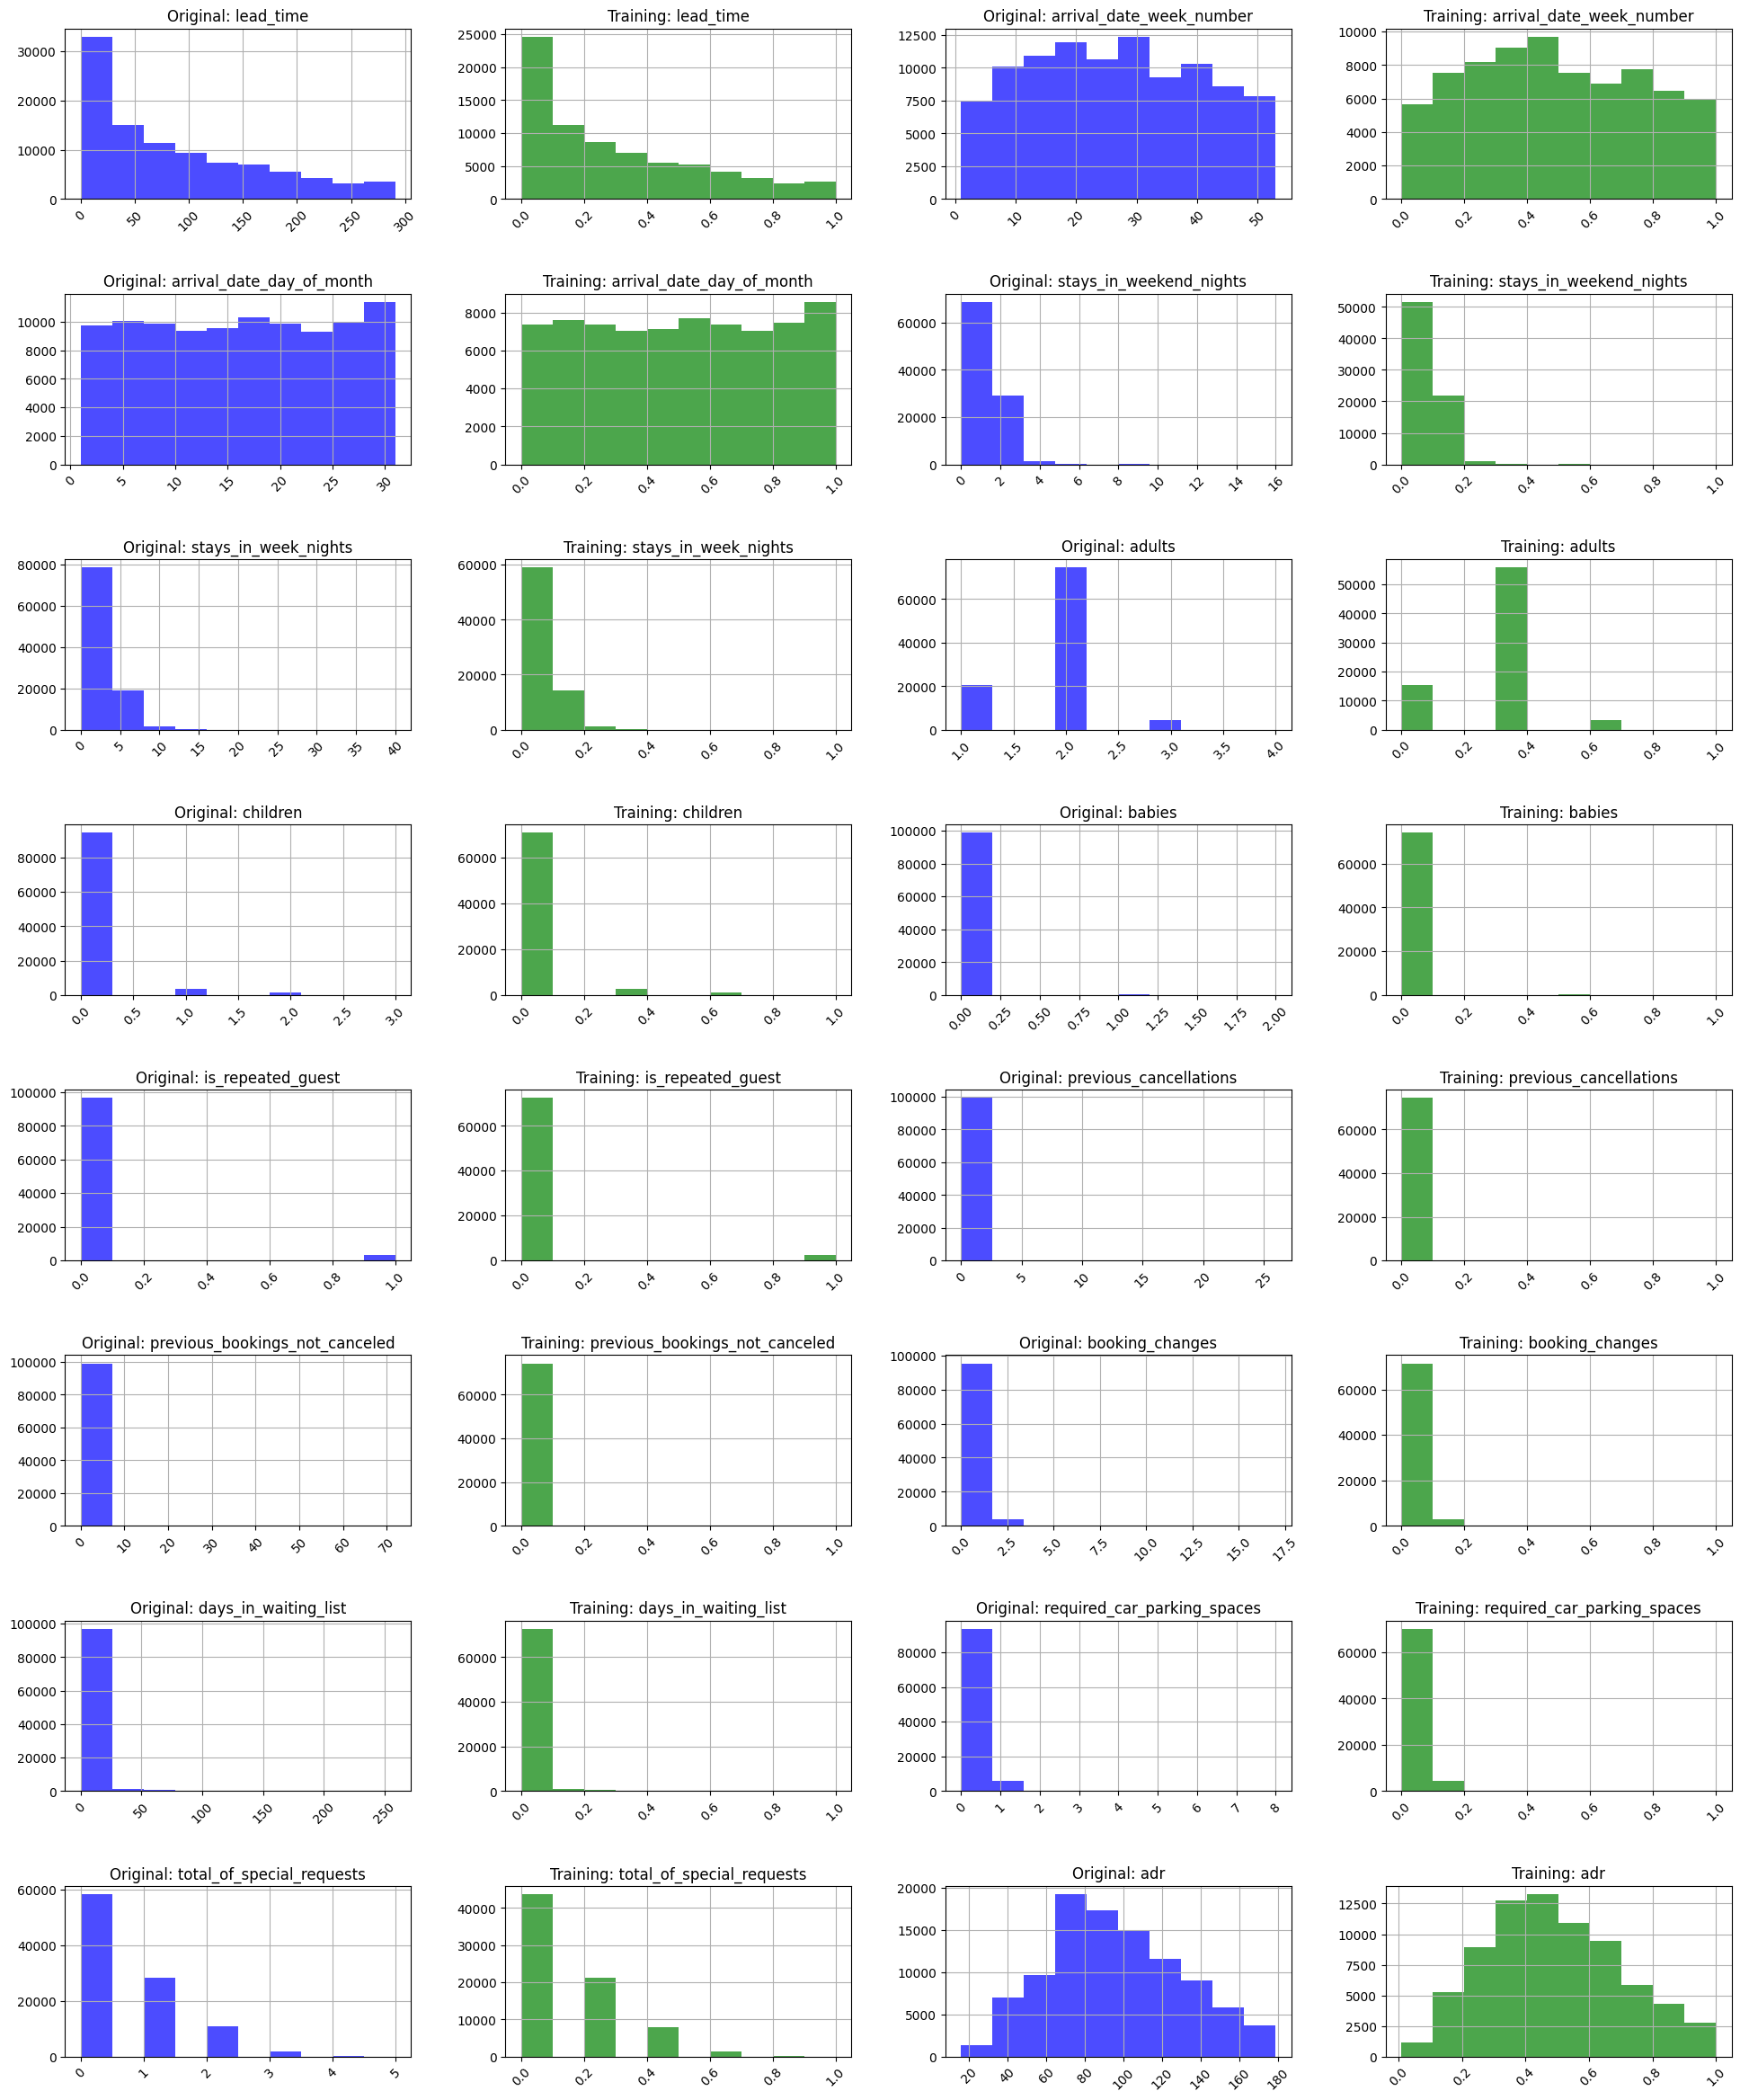

In [ ]:
# Check if all numerical columns from training are approximately the same as the original
# List of columns to compare
columns_to_compare = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                      'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                      'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces',
                      'total_of_special_requests','adr']

# Set up the grid dynamically to have 4 pairs (8 plots) per row
pairs_per_row = 4
rows = (len(columns_to_compare) + pairs_per_row - 1) // pairs_per_row  # Calculate rows needed
fig, axes = plt.subplots(rows * 2, pairs_per_row, figsize=(20, rows * 6))  # Dynamic figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through the columns and create histograms for original and train datasets
for i, column in enumerate(columns_to_compare):
    # Original dataset (Top row of the pair)
    df_cleaned2[column].hist(ax=axes[i * 2], color='blue', alpha=0.7)
    axes[i * 2].set_title(f'Original: {column}', fontsize=12)
    axes[i * 2].tick_params(axis='x', rotation=45)

    # Training dataset (Bottom row of the pair)
    X_train[column].hist(ax=axes[i * 2 + 1], color='green', alpha=0.7)
    axes[i * 2 + 1].set_title(f'Training: {column}', fontsize=12)
    axes[i * 2 + 1].tick_params(axis='x', rotation=45)

# Remove unused subplots if the number of columns doesn't fit perfectly
for j in range(len(columns_to_compare) * 2, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=3)
plt.show()


## **Base Model Selection**

In [ ]:
# Select TOP 5 out of 7 ML Models
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=UserWarning)  # Ignore user warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignore future warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)  # Ignore deprecation warnings

# Set a random seed for reproducibility
seed = 42

# Define all models (updated list, replacing SVC with LGBMClassifier)
# Changed 'model' to 'classifier_models' to avoid conflict with previous variable name
classifier_models = [
    ('LR_L2', LogisticRegression(penalty='l2', max_iter=1000)),  # Logistic Regression (L2)
    ('KNN7', KNeighborsClassifier(7)),  # KNN (k=7)
    ('CART', DecisionTreeClassifier(random_state=seed)),  # Decision Tree
    ('NB', GaussianNB()),  # Naive Bayes
    ('GBM', GradientBoostingClassifier(n_estimators=100, max_features='sqrt', random_state=seed)),  # Gradient Boosting
    ('RF_Gini100', RandomForestClassifier(criterion='gini', n_estimators=100, random_state=seed)),  # RF (Gini, 100 Estimators)
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed))  # XGBoost
]

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=seed)

# Evaluate each model using cross-validation and store the results
results = []
model_names = []

# Changed 'models' to 'classifier_models' to match the updated variable name
for name, model in classifier_models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    results.append(cv_scores)
    model_names.append(name)
    print(f"{name}: {cv_scores.mean():.6f} ({cv_scores.std():.6f})")

LR_L2: 0.799780 (0.002487)
KNN7: 0.820471 (0.002263)
CART: 0.838817 (0.002825)
NB: 0.429325 (0.004692)
GBM: 0.819238 (0.003504)
RF_Gini100: 0.877640 (0.001976)
XGB: 0.858865 (0.003013)


In [ ]:
# Random Forest (RF_Gini100)
rf_gini = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42)
rf_gini.fit(X_train, y_train)
y_pred_rf_gini = rf_gini.predict(X_test)

# K-Nearest Neighbors (KNN7)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_pred_knn7 = knn7.predict(X_test)

# Decision Tree (CART)
cart = DecisionTreeClassifier(random_state=42)  # CART = Classification and Regression Tree
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)

# Gradient Boosting Machine (GBM)
gbm = GradientBoostingClassifier(n_estimators=100, max_features='sqrt', random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

# Extreme Gradient Boosting (XGB)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Checking Binary prediction 0 and 1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, matthews_corrcoef
import pandas as pd

# Create a dictionary of models and their predictions
data = {
    'RF_Gini100': y_pred_rf_gini,
    'KNN7': y_pred_knn7,
    'CART': y_pred_cart,
    'GBM': y_pred_gbm,
    'XGB': y_pred_xgb
}

# Initialize a DataFrame to store the results
model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews Corrcoef'])

# Iterate through each model's predictions
for model_name, predictions in data.items():
    CM = confusion_matrix(y_test, predictions)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    # Calculate metrics
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    mathew = matthews_corrcoef(y_test, predictions)

    # Store the results in a DataFrame as a single row
    results = pd.DataFrame([[model_name, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews Corrcoef'])

    model_results = pd.concat([model_results, results], ignore_index=True)

# Display the results in the requested format
# print(model_results.to_string(index=False))
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,Matthews Corrcoef
0,RF_Gini100,0.884220,0.882237,0.771970,0.944585,0.823429,0.858278,4.173140,0.741509
1,KNN7,0.828218,0.787113,0.697415,0.898561,0.739554,0.797988,6.191654,0.614590
2,CART,0.842841,0.770028,0.785066,0.873911,0.777474,0.829489,5.664582,0.656090
3,GBM,0.817451,0.829662,0.601493,0.933589,0.697389,0.767541,6.579719,0.586549
4,XGB,0.862406,0.833249,0.758300,0.918391,0.794010,0.838346,4.959405,0.692787


In [ ]:
# Compare Test Models
data = {
    'RF_Gini100': y_pred_rf_gini,
    'KNN7': y_pred_knn7,
    'CART': y_pred_cart,
    'GBM': y_pred_gbm,
    'XGB': y_pred_xgb
}

model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews Corrcoef'])

for model_name, model in zip(data.keys(), [rf_gini, knn7, cart, gbm, xgb]):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]  # Use probabilities for AUC calculation

    CM = confusion_matrix(y_test, predictions)
    TN, FP, FN, TP = CM.ravel()

    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test, probabilities)  # Use probabilities here
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    mathew = matthews_corrcoef(y_test, predictions)

    results = pd.DataFrame([[model_name, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews Corrcoef'])
    model_results = pd.concat([model_results, results], ignore_index=True)

# Display the updated results
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,Matthews Corrcoef
0,RF_Gini100,0.884220,0.882237,0.771970,0.944585,0.823429,0.948772,4.173140,0.741509
1,KNN7,0.828218,0.787113,0.697415,0.898561,0.739554,0.890754,6.191654,0.614590
2,CART,0.842841,0.770028,0.785066,0.873911,0.777474,0.831529,5.664582,0.656090
3,GBM,0.817451,0.829662,0.601493,0.933589,0.697389,0.901634,6.579719,0.586549
4,XGB,0.862406,0.833249,0.758300,0.918391,0.794010,0.936213,4.959405,0.692787


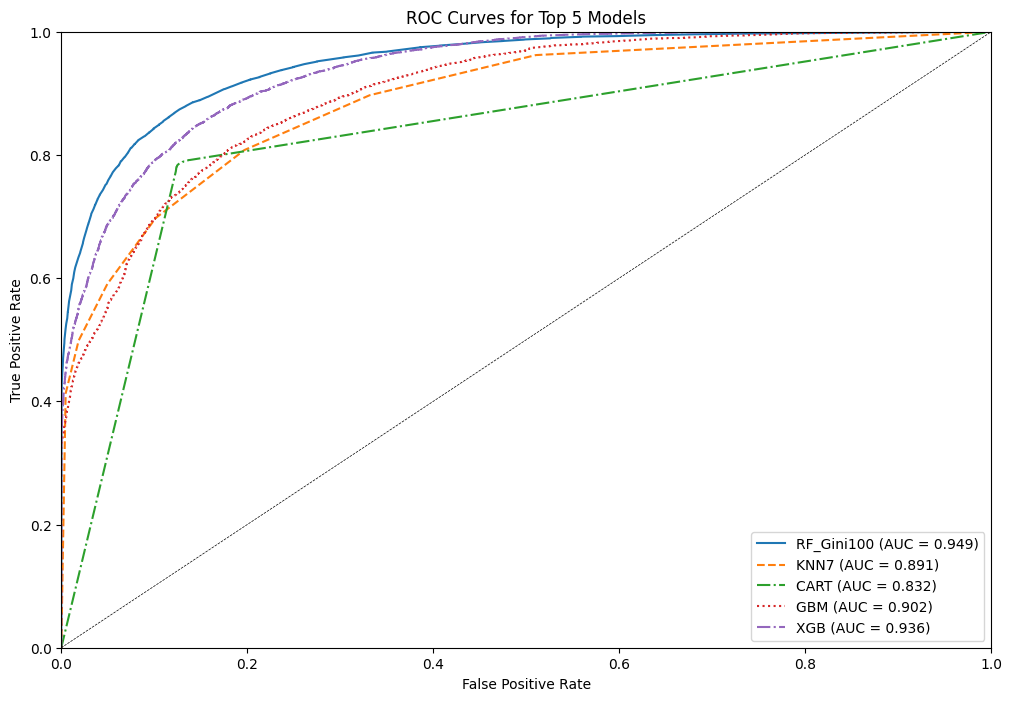

In [ ]:
#Plot ROC-AUC Curve for Top 5

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def roc_auc_plot(y_true, y_proba, label='', linestyle='-', linewidth=1.5):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=linestyle, linewidth=linewidth, label=f"{label} (AUC = {auc_score:.3f})")

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot ROC curves for each model
roc_auc_plot(y_test, rf_gini.predict_proba(X_test)[:, 1], label='RF_Gini100', linestyle='-')
roc_auc_plot(y_test, knn7.predict_proba(X_test)[:, 1], label='KNN7', linestyle='--')
roc_auc_plot(y_test, cart.predict_proba(X_test)[:, 1], label='CART', linestyle='-.')
roc_auc_plot(y_test, gbm.predict_proba(X_test)[:, 1], label='GBM', linestyle=':')
roc_auc_plot(y_test, xgb.predict_proba(X_test)[:, 1], label='XGB', linestyle='-.')

# Plot diagonal line for random guessing
ax.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=0.5)

# Labels and title
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC Curves for Top 5 Models')

# Display the plot
plt.show()

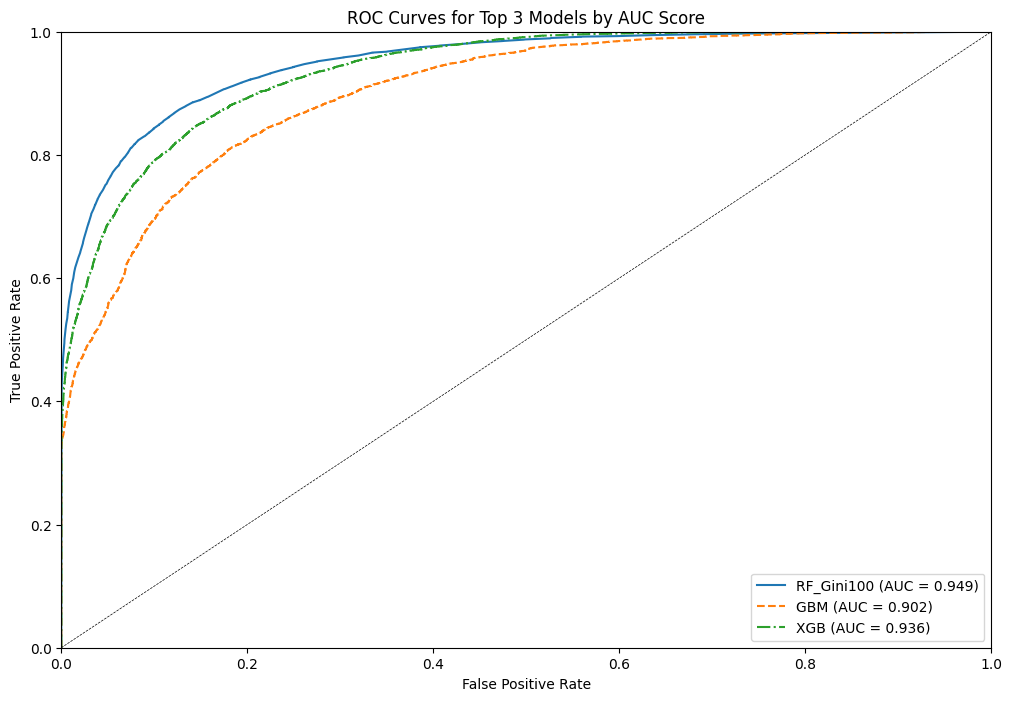

In [ ]:
#Narrow it to Top 3 for readability

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve for each model
def roc_auc_plot(y_true, y_proba, label='', linestyle='-', linewidth=1.5):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=linestyle, linewidth=linewidth, label=f"{label} (AUC = {auc_score:.3f})")

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot ROC curves for the top 3 models based on AUC scores
roc_auc_plot(y_test, rf_gini.predict_proba(X_test)[:, 1], label='RF_Gini100', linestyle='-')
roc_auc_plot(y_test, gbm.predict_proba(X_test)[:, 1], label='GBM', linestyle='--')
roc_auc_plot(y_test, xgb.predict_proba(X_test)[:, 1], label='XGB', linestyle='-.')

# Plot diagonal line for random guessing
ax.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=0.5)

# Labels and title
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC Curves for Top 3 Models by AUC Score')

# Display the plot
plt.show()

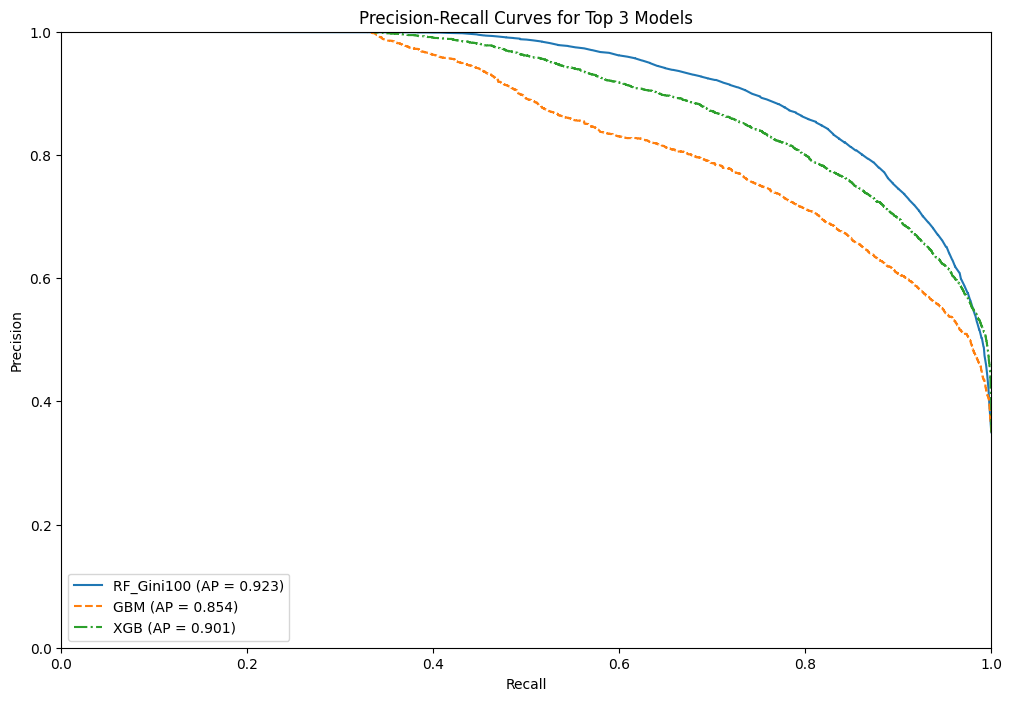

In [ ]:
# Top 3 Precision Curves

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curve for each model
def precision_recall_plot(y_true, y_proba, label='', linestyle='-', linewidth=1.5):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    avg_precision = average_precision_score(y_true, y_proba)
    ax.plot(recall, precision, linestyle=linestyle, linewidth=linewidth,
            label=f"{label} (AP = {avg_precision:.3f})")

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Precision-Recall curves for the top 3 models
precision_recall_plot(y_test, rf_gini.predict_proba(X_test)[:, 1], label='RF_Gini100', linestyle='-')
precision_recall_plot(y_test, gbm.predict_proba(X_test)[:, 1], label='GBM', linestyle='--')
precision_recall_plot(y_test, xgb.predict_proba(X_test)[:, 1], label='XGB', linestyle='-.')

# Labels and title
ax.legend(loc="lower left")
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves for Top 3 Models')

# Display the plot
plt.show()

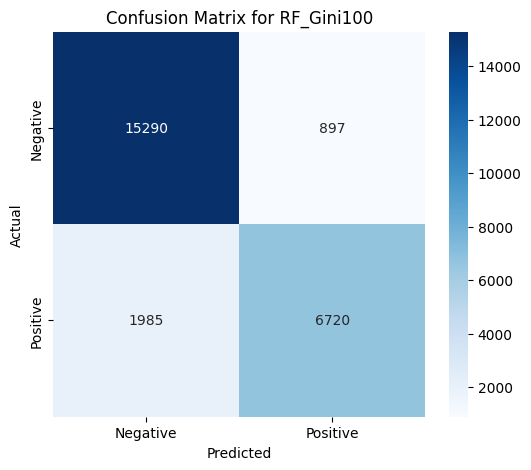

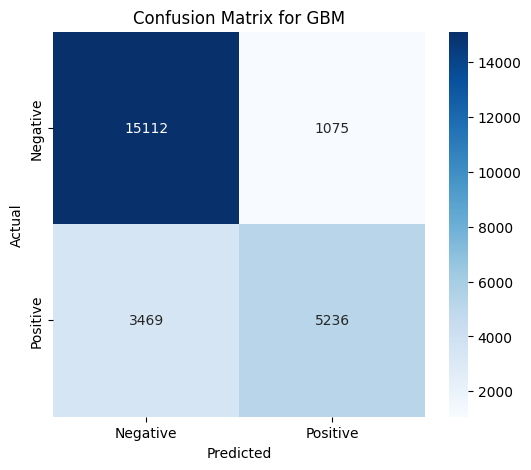

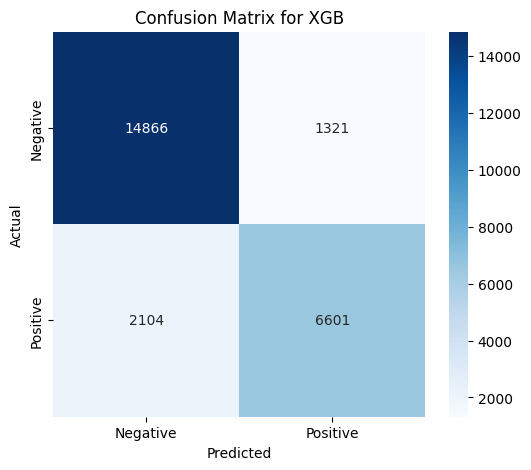

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Calculate confusion matrix
    plt.figure(figsize=(6, 5))

    # Use seaborn to plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Add labels and title
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each of the top 3 models
plot_confusion_matrix(y_test, y_pred_rf_gini, "RF_Gini100")
plot_confusion_matrix(y_test, y_pred_gbm, "GBM")
plot_confusion_matrix(y_test, y_pred_xgb, "XGB")

## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_gini = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42)


# Define RFE
rfe_rf = RFE(estimator=rf_gini, n_features_to_select=108)

# Fit RFE
rfe_rf.fit(X_train, y_train)

# Get selected features
selected_features_rf = X_train.columns[rfe_rf.support_]
X_train_rf_rfe = rfe_rf.transform(X_train)
X_test_rf_rfe = rfe_rf.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gbm = GradientBoostingClassifier(n_estimators=100, max_features='sqrt', random_state=42)

# Define RFE
rfe_gbm = RFE(estimator=gbm, n_features_to_select=108)

# Fit RFE
rfe_gbm.fit(X_train, y_train)

# Get selected features
selected_features_gbm = X_train.columns[rfe_gbm.support_]
X_train_gbm_rfe = rfe_gbm.transform(X_train)
X_test_gbm_rfe = rfe_gbm.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Instantiate the model
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define RFE
rfe_xgb = RFE(estimator=xgb, n_features_to_select=108)

# Fit RFE
rfe_xgb.fit(X_train, y_train)

# Get selected features
selected_features_xgb = X_train.columns[rfe_xgb.support_]
X_train_xgb_rfe = rfe_xgb.transform(X_train)
X_test_xgb_rfe = rfe_xgb.transform(X_test)

In [ ]:
# Convert the set of final selected features to a list
final_selected_features = list(set(selected_features_rf) | set(selected_features_xgb) | set(selected_features_gbm))

# Index the DataFrame with the list of features
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

In [ ]:
X_train_final

,reserved_room_type_F,meal_FB,country_ESP,country_IDN,country_NAM,children,country_GBR,country_ISL,country_BRA,country_IRQ,...,adr,country_SVK,country_LCA,country_ALB,market_segment_Online TA,reserved_room_type_E,previous_bookings_not_canceled,country_LVA,babies,country_TUR
74239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.639410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.700891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42869,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.703966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.563357,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.897633,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
76820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.803566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.959115,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_final

,reserved_room_type_F,meal_FB,country_ESP,country_IDN,country_NAM,children,country_GBR,country_ISL,country_BRA,country_IRQ,...,adr,country_SVK,country_LCA,country_ALB,market_segment_Online TA,reserved_room_type_E,previous_bookings_not_canceled,country_LVA,babies,country_TUR
67783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.442668,0.0,0.0,0.0,0.0,0.0,0.013889,0.0,0.0,0.0
57758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.634491,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
24808,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.418076,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
87488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.424224,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
96659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.946818,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.408484,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
18396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410329,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
59176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.323455,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
48553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.560098,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0


## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid (smaller range for faster tuning)
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5],  # Minimum samples to split
    'min_samples_leaf': [1, 2],  # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features considered for splits
}

# Use RandomizedSearchCV for faster hyperparameter tuning
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of iterations for random search (limit to 10 for faster tuning)
    scoring='average_precision',  # Optimize for precision-recall
    cv=3,  # Use 3-fold cross-validation for faster performance
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Perform the search
rf_random_search.fit(X_train_final, y_train)

# Get the best Random Forest model
best_rf = rf_random_search.best_estimator_

# Display the best hyperparameters
print(f"Best Random Forest Parameters: {rf_random_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    log_loss,
)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test_final)
y_proba_best_rf = best_rf.predict_proba(X_test_final)[:, 1]  # For probabilities

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_proba_best_rf)
accuracy = accuracy_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)
mcc = matthews_corrcoef(y_test, y_pred_best_rf)
logloss = log_loss(y_test, y_proba_best_rf)

# Display the results
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Matthews Correlation Coefficient: {mcc:.3f}")
print(f"Log Loss: {logloss:.3f}\n")
print("Classification Report:")print(classification_report(y_test, y_pred_best_rf))


ROC-AUC: 0.950
Accuracy: 0.883
Precision: 0.881
Recall (Sensitivity): 0.770
F1-Score: 0.822
Matthews Correlation Coefficient: 0.739
Log Loss: 0.282

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16187
           1       0.88      0.77      0.82      8705

    accuracy                           0.88     24892
   macro avg       0.88      0.86      0.87     24892
weighted avg       0.88      0.88      0.88     24892



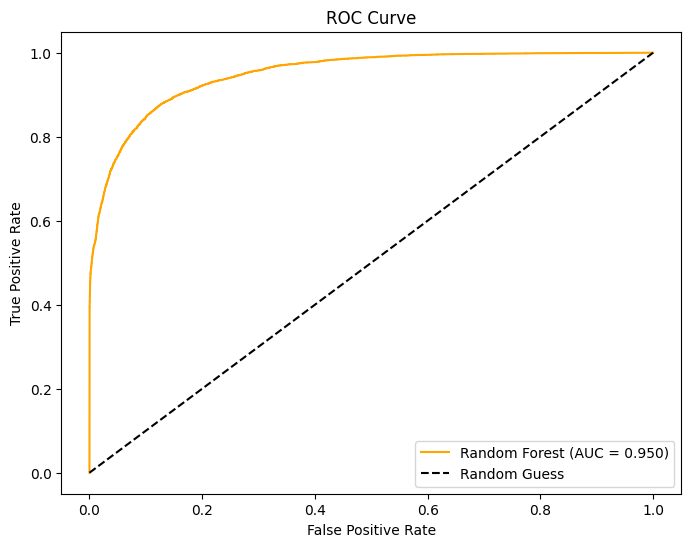

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# GBM hyperparameter tuning
gbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

gbm_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=gbm_param_grid,
    n_iter=20,  # Number of parameter combinations to try
    scoring='average_precision',  # Replace with 'roc_auc' if needed
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit RandomizedSearchCV for GBM
gbm_random_search.fit(X_train_final, y_train)
best_gbm = gbm_random_search.best_estimator_

# Output best parameters and estimator
print("Gradient Boosting Best Parameters:")
print(gbm_random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Gradient Boosting Best Parameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.2}


In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    log_loss,
)

# Predict on the test set for GBM
y_pred_best_gbm = best_gbm.predict(X_test_final)
y_proba_best_gbm = best_gbm.predict_proba(X_test_final)[:, 1]  # For probabilities

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_proba_best_gbm)
accuracy = accuracy_score(y_test, y_pred_best_gbm)
precision = precision_score(y_test, y_pred_best_gbm)
recall = recall_score(y_test, y_pred_best_gbm)
f1 = f1_score(y_test, y_pred_best_gbm)
mcc = matthews_corrcoef(y_test, y_pred_best_gbm)
logloss = log_loss(y_test, y_proba_best_gbm)

# Display the results
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Matthews Correlation Coefficient: {mcc:.3f}")
print(f"Log Loss: {logloss:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_gbm))

ROC-AUC: 0.928
Accuracy: 0.853
Precision: 0.828
Recall (Sensitivity): 0.732
F1-Score: 0.777
Matthews Correlation Coefficient: 0.671
Log Loss: 0.317

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     16187
           1       0.83      0.73      0.78      8705

    accuracy                           0.85     24892
   macro avg       0.85      0.83      0.83     24892
weighted avg       0.85      0.85      0.85     24892



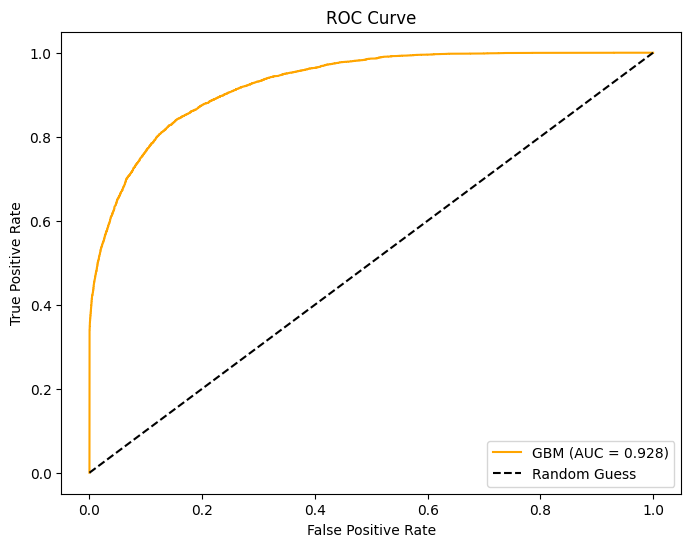

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_gbm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GBM (AUC = {roc_auc:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='average_precision',
    cv=5,
    verbose=1,
    n_jobs=-1
)
xgb_random_search.fit(X_train_final, y_train)
best_xgb = xgb_random_search.best_estimator_

print("XGBoost Best Parameters:")
print("n_estimator:", best_xgb.n_estimators)
print("max_depth:", best_xgb.max_depth)
print("learning_rate:", best_xgb.learning_rate)
print("subsample:", best_xgb.subsample)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost Best Parameters:
n_estimator: 200
max_depth: 9
learning_rate: 0.2
subsample: 1.0


In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    log_loss,
)

# Predict on the test set
y_pred_best_xgb = best_xgb.predict(X_test_final)
y_proba_best_xgb = best_xgb.predict_proba(X_test_final)[:, 1]  # For probabilities

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_proba_best_xgb)
accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb)
recall = recall_score(y_test, y_pred_best_xgb)
f1 = f1_score(y_test, y_pred_best_xgb)
mcc = matthews_corrcoef(y_test, y_pred_best_xgb)
logloss = log_loss(y_test, y_proba_best_xgb)

# Display the results
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Matthews Correlation Coefficient: {mcc:.3f}")
print(f"Log Loss: {logloss:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))


ROC-AUC: 0.947
Accuracy: 0.876
Precision: 0.852
Recall (Sensitivity): 0.781
F1-Score: 0.815
Matthews Correlation Coefficient: 0.724
Log Loss: 0.273

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     16187
           1       0.85      0.78      0.82      8705

    accuracy                           0.88     24892
   macro avg       0.87      0.85      0.86     24892
weighted avg       0.87      0.88      0.87     24892



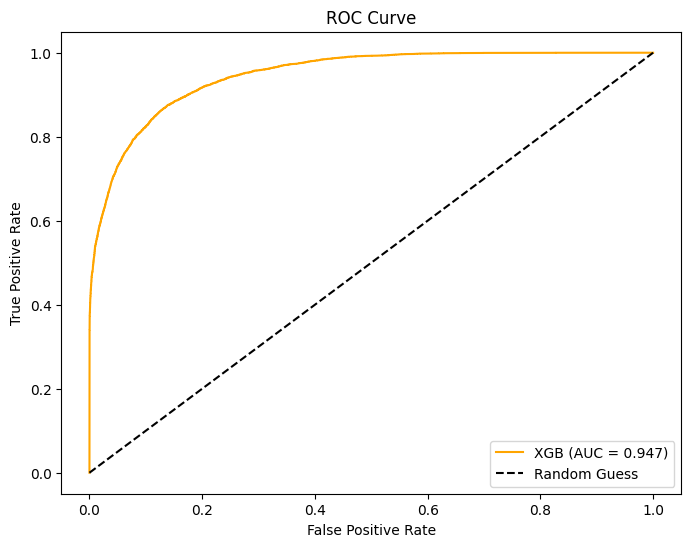

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGB (AUC = {roc_auc:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


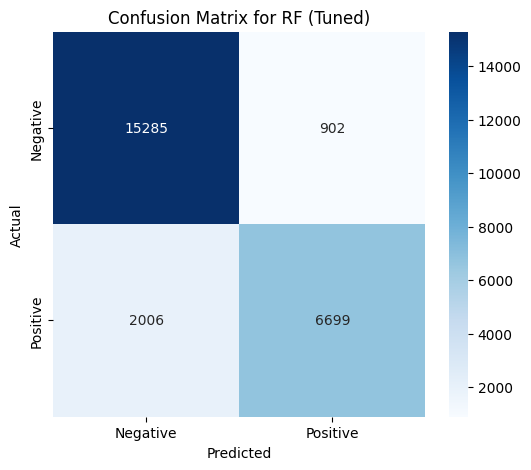

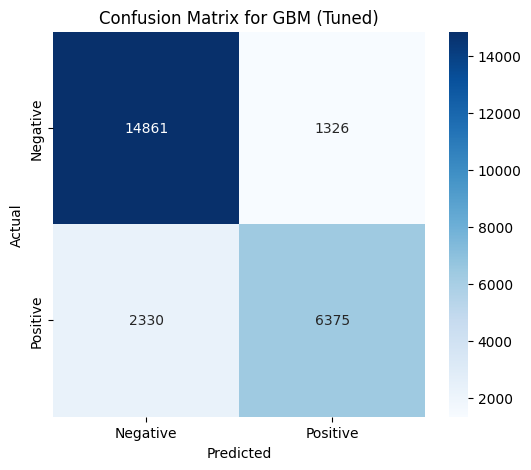

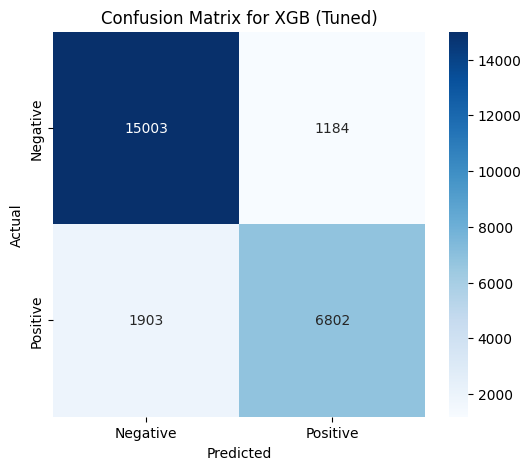

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Calculate confusion matrix
    plt.figure(figsize=(6, 5))

    # Use seaborn to plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Add labels and title
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each of the models
plot_confusion_matrix(y_test, y_pred_best_rf, "RF (Tuned)")
plot_confusion_matrix(y_test, y_pred_best_gbm, "GBM (Tuned)")
plot_confusion_matrix(y_test, y_pred_best_xgb, "XGB (Tuned)")

## **Soft Voting**

In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    log_loss,
)

# Predict probabilities for each tuned model
proba_rf = best_rf.predict_proba(X_test_final)[:, 1]  # Random Forest
proba_gbm = best_gbm.predict_proba(X_test_final)[:, 1]  # Gradient Boosting
proba_xgb = best_xgb.predict_proba(X_test_final)[:, 1]  # XGBoost

# Compute the average of probabilities (soft voting)
avg_proba = np.mean([proba_rf, proba_xgb, proba_gbm], axis=0)

# Convert probabilities to class labels (threshold = 0.5)
final_predictions = (avg_proba >= 0.5).astype(int)

# Evaluate performance
roc_auc = roc_auc_score(y_test, avg_proba)
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
mcc = matthews_corrcoef(y_test, final_predictions)
logloss = log_loss(y_test, final_predictions)

# Display the results
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Matthews Correlation Coefficient: {mcc:.3f}")
print(f"Log Loss: {logloss:.3f}\n")
print("\nClassification Report:")
print(classification_report(y_test, final_predictions))

ROC-AUC: 0.949
Accuracy: 0.879
Precision: 0.868
Recall (Sensitivity): 0.770
F1-Score: 0.816
Matthews Correlation Coefficient: 0.729
Log Loss: 4.370


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16187
           1       0.87      0.77      0.82      8705

    accuracy                           0.88     24892
   macro avg       0.88      0.85      0.86     24892
weighted avg       0.88      0.88      0.88     24892



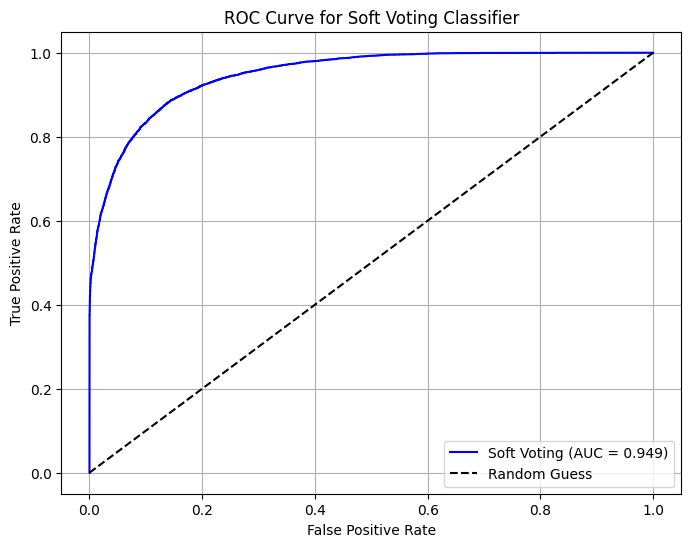

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, avg_proba)
roc_auc = roc_auc_score(y_test, avg_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Soft Voting (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Soft Voting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

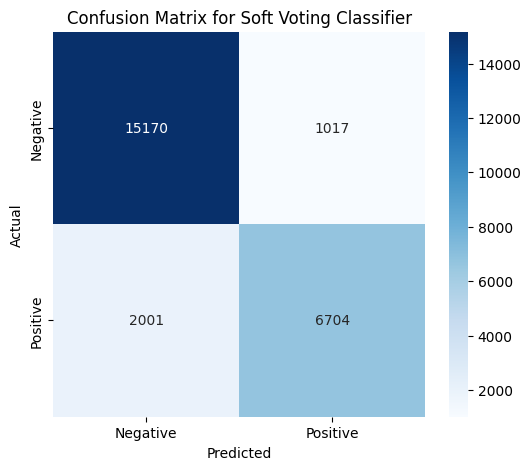

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Calculate confusion matrix
    plt.figure(figsize=(6, 5))

    # Use seaborn to plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Add labels and title
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each of the models
plot_confusion_matrix(y_test, final_predictions, "Soft Voting Classifier")

## Feature Importance

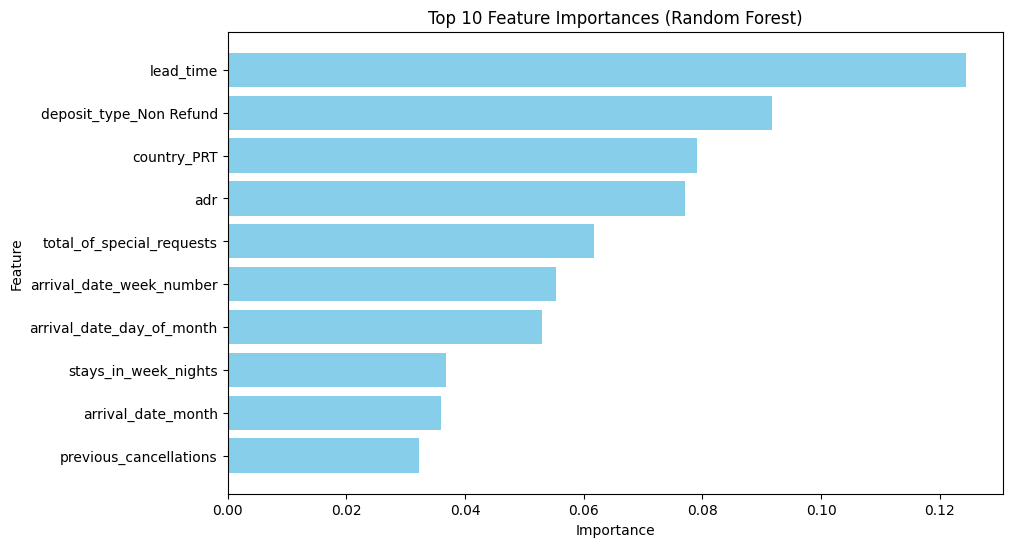

                       Feature  Importance
33                   lead_time    0.124335
54     deposit_type_Non Refund    0.091741
14                 country_PRT    0.079015
144                        adr    0.077044
100  total_of_special_requests    0.061812
61    arrival_date_week_number    0.055368
36   arrival_date_day_of_month    0.053030
24        stays_in_week_nights    0.036883
59          arrival_date_month    0.036016
129     previous_cancellations    0.032333


In [ ]:
# Get feature importances from RF
rf_importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display top 10 features
print(feature_importance_df.head(10))